In [66]:
import json
import csv
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\santi\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alt'>

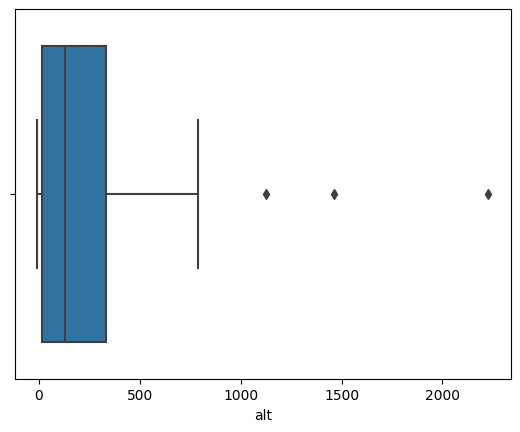

In [67]:
circuits = pd.read_csv('circuits.csv')
circuits.head()
sns.boxplot(circuits['alt'])


In [73]:
constructors_filt = pd.read_json('constructors.json', lines=True)
constructors_filt.head()


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [74]:
constructors_filt['name'].unique()

array(['McLaren', 'BMW Sauber', 'Williams', 'Renault', 'Toro Rosso',
       'Ferrari', 'Toyota', 'Super Aguri', 'Red Bull', 'Force India',
       'Honda', 'Spyker', 'MF1', 'Spyker MF1', 'Sauber', 'BAR', 'Jordan',
       'Minardi', 'Jaguar', 'Prost', 'Arrows', 'Benetton', 'Brawn',
       'Stewart', 'Tyrrell', 'Lola', 'Ligier', 'Forti', 'Footwork',
       'Pacific', 'Simtek', 'Team Lotus', 'Larrousse', 'Brabham',
       'Dallara', 'Fondmetal', 'March', 'Andrea Moda', 'AGS', 'Lambo',
       'Leyton House', 'Coloni', 'Euro Brun', 'Osella', 'Onyx', 'Life',
       'Rial', 'Zakspeed', 'RAM', 'Alfa Romeo', 'Spirit', 'Toleman',
       'ATS', 'Theodore', 'Fittipaldi', 'Ensign', 'Shadow', 'Wolf',
       'Merzario', 'Kauhsen', 'Rebaque', 'Surtees', 'Hesketh', 'Martini',
       'BRM', 'Penske', 'LEC', 'McGuire', 'Boro', 'Apollon', 'Kojima',
       'Parnelli', 'Maki', 'Embassy Hill', 'Lyncar', 'Trojan', 'Amon',
       'Token', 'Iso Marlboro', 'Tecno', 'Matra', 'Politoys', 'Connew',
       'Bellasi',

In [57]:
driver = pd.read_json('drivers.json', lines=True)

In [75]:
driver.head()

,driverId,driverRef,number,code,name,dob,nationality,url
0,1,hamilton,44,HAM,"{'forename': 'Lewis', 'surname': 'Hamilton'}",1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,"{'forename': 'Nick', 'surname': 'Heidfeld'}",1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,"{'forename': 'Nico', 'surname': 'Rosberg'}",1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,"{'forename': 'Fernando', 'surname': 'Alonso'}",1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,"{'forename': 'Heikki', 'surname': 'Kovalainen'}",1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [59]:
driver1= pd.json_normalize(driver.name)

In [90]:
driver2= driver.assign(Forename=driver1['forename'] )
driver3= driver2.assign(Surname= driver1['surname'])
driver3.drop(['name'],axis=1,inplace=True)

In [92]:
driver3 = driver3[['driverId','Forename','Surname','driverRef','number','code','dob','nationality','url']]

In [94]:
driver3['number'].unique()

array([44, '\\N', 6, 14, 7, 88, 19, 99, 22, 5, 8, 10, 27, 13, 11, 3, 25,
       4, 21, 77, 17, 20, 26, 45, 9, 28, 33, 12, 55, 98, 53, 30, 94, 2,
       31, 18, 16, 35, 63, 23, 51, 89], dtype=object)

In [95]:
result = pd.read_json('results.json', lines=True)
result.shape


(24960, 18)

In [33]:
result.to_csv( 'results_filt.csv',index=False)

In [92]:
driver = pd.read_json('drivers.json', orient='values',lines=True)
print(driver.name)

0         {'forename': 'Lewis', 'surname': 'Hamilton'}
1          {'forename': 'Nick', 'surname': 'Heidfeld'}
2           {'forename': 'Nico', 'surname': 'Rosberg'}
3        {'forename': 'Fernando', 'surname': 'Alonso'}
4      {'forename': 'Heikki', 'surname': 'Kovalainen'}
                            ...                       
848    {'forename': 'Pietro', 'surname': 'Fittipaldi'}
849          {'forename': 'Jack', 'surname': 'Aitken'}
850         {'forename': 'Yuki', 'surname': 'Tsunoda'}
851       {'forename': 'Nikita', 'surname': 'Mazepin'}
852      {'forename': 'Mick', 'surname': 'Schumacher'}
Name: name, Length: 853, dtype: object


In [124]:
pit_stops = pd.read_json('pit_stops.json')


In [127]:
pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8025,1047,20,1,35,18:17:15,22.04,22040
8026,1047,849,2,35,18:17:41,22.384,22384
8027,1047,817,1,39,18:23:37,22.123,22123
8028,1047,825,2,47,18:39:11,23.098,23098


C:\Users\santi\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='milliseconds'>

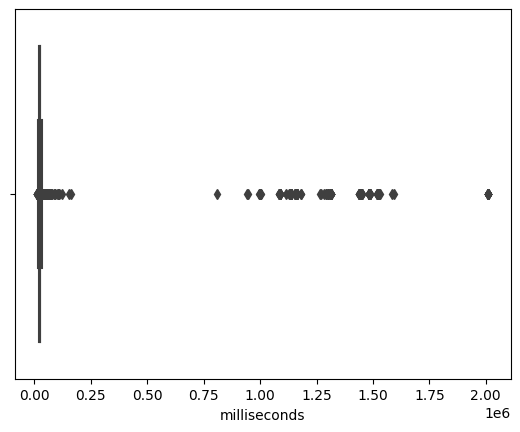

In [128]:
sns.boxplot(pit_stops['milliseconds'])

In [96]:

result1 = pd.read_csv('results_filt.csv')

In [98]:
result1.head(20)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1
5,6,18,6,3,8.0,13,6.0,6,6,3.0,57,NaN,NaN,50.0,14.0,1:29.639,212.974,11
6,7,18,7,5,14.0,17,7.0,7,7,2.0,55,NaN,NaN,22.0,12.0,1:29.534,213.224,5
7,8,18,8,6,1.0,15,8.0,8,8,1.0,53,NaN,NaN,20.0,4.0,1:27.903,217.180,5
8,9,18,9,2,4.0,2,NaN,NaN,9,0.0,47,NaN,NaN,15.0,9.0,1:28.753,215.100,4
9,10,18,10,7,12.0,18,NaN,NaN,10,0.0,43,NaN,NaN,23.0,13.0,1:29.558,213.166,3


C:\Users\santi\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='points'>

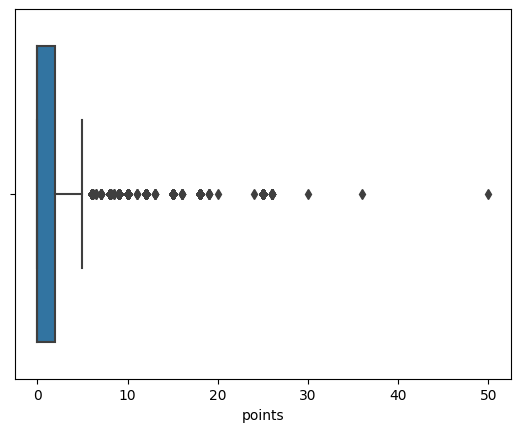

In [120]:
sns.boxplot(result1['points'])


C:\Users\santi\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='position'>

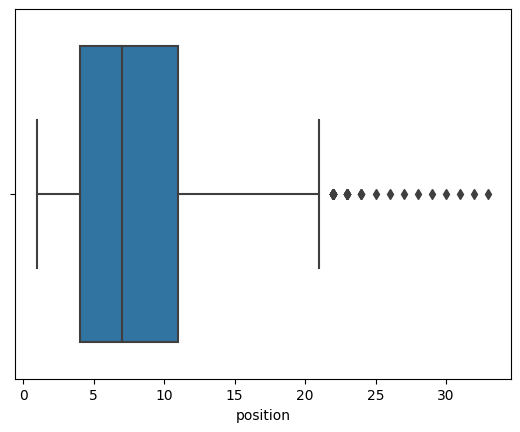

In [121]:
sns.boxplot(result1['position'])

In [122]:
result1['position'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., nan,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33.])

In [112]:
mask1= (result1['points'] > 25)


In [123]:
result1[mask1].head(20)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
22514,22518,918,1,131,44.0,2,1.0,1,1,50.0,55,1:39:02.619,5942619.0,49.0,4.0,1:45.599,189.342,1
22515,22519,918,13,3,19.0,4,2.0,2,2,36.0,55,+2.576,5945195.0,47.0,2.0,1:44.826,190.738,1
22516,22520,918,822,3,77.0,3,3.0,3,3,30.0,55,+28.880,5971499.0,54.0,6.0,1:45.727,189.113,1
24197,24203,1010,822,131,77.0,2,1.0,1,1,26.0,58,1:25:27.325,5127325.0,57.0,1.0,1:25.580,223.075,1
24277,24283,1014,1,131,44.0,2,1.0,1,1,26.0,66,1:35:50.443,5750443.0,54.0,1.0,1:18.492,213.499,1
24360,24366,1018,830,9,33.0,2,1.0,1,1,26.0,71,1:22:01.822,4921822.0,60.0,1.0,1:07.475,230.378,1
24380,24386,1019,1,131,44.0,2,1.0,1,1,26.0,52,1:21:08.452,4868452.0,52.0,1.0,1:27.369,242.735,1
24400,24406,1020,830,9,33.0,2,1.0,1,1,26.0,64,1:44:31.275,6271275.0,61.0,1.0,1:16.645,214.839,1
24500,24506,1025,1,131,44.0,2,1.0,1,1,26.0,53,1:33:38.992,5618992.0,51.0,1.0,1:35.761,219.847,1
24601,24606,1030,1,131,44.0,1,1.0,1,1,26.0,55,1:34:05.715,5645715.0,53.0,1.0,1:39.283,201.387,1


In [ ]:
result1.replace(to_replace=["F"],value = None, inplace=True)
result1.to_csv( 'results_filt.csv',index=False)
